<h1 style="color:red;"><b> Welcome to DSC170 "Spatial Data Science and Applications"! </b></h1>
<h1><b>Lecture 1: Introductory Demo</b></h1>


Class Intro slide deck: https://docs.google.com/presentation/d/1qzzeryYdUM_DMgjGBUlKi2J-HguXbR9dJ6HBmbiMdws/edit?usp=sharing


## Making maps with ArcGIS
A brief example of using ArcGIS API for Python. ArcGIS Python API is a popular package for GIS and spatial analysis. We'll use it more extensively after exploring free open source libraries such as Geopandas.

See more about ArcGIS API at https://github.com/Esri/arcgis-python-api and https://developers.arcgis.com/python/. We will use these resources extensively.

In [1]:
# In this course, we are NOT interested in maps like this ==>

import IPython.display as display
osm = """
<iframe width="425" height="350" frameborder="0" scrolling="no" 
marginheight="0" marginwidth="0" 
src="https://www.openstreetmap.org/export/embed.html?bbox=-117.24879741668703%2C32.87708229664578%2C-117.23815441131593%2C32.894921239943265&amp;layer=mapnik" 
style="border: 1px solid black"></iframe><br/>

<small>
<a href="https://www.openstreetmap.org/#map=16/32.8860/-117.2435">
View Larger Map</a></small>
"""
display.HTML(osm)

The request above merely generates a reference map (as image tiles) from the Open Street Map (https://www.openstreetmap.org/) service given bounding box coordinates, and shows it in an HTML iframe 

### First, we import python libraries. You are familiar with some of them

In [2]:
import arcgis
from arcgis.gis import GIS
import pandas as pd
import numpy as np


arcgis.__version__

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


'2.4.0'

<strong>The maps we are interested in will be composed from layers of information, showing different types of thematic information. Some of these layers will be computed from other data layers, display results of statistical models, or show predictions derived using machine learning tools </strong>



### Connecting with a GIS server

Next step is to connect to GIS server at arcgis.com. For advanced operations you will need to specify your username and password, but merely finding and displaying information on a map does not require authentication.

In [3]:
# general form: gis = GIS("http://arcgis.com", "username", "password")

gis = GIS() # anonymous connection (no credits will be used)

# login with UCSD Single-Sign-On. 
gis=GIS("https://ucsdonline.maps.arcgis.com/home", client_id="bZshlNXFuaR2KHff") 

# gis = GIS("https://ucsdonline.maps.arcgis.com/home", client_id="N0qE8XLDg3AxZV5r")
# there are other ways to login, we'll look at this later

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ucsdonline.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=bZshlNXFuaR2KHff&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=HIbYOsQVvJjnfEvGKWQG7KTY0M0J4X&allow_verification=false


### What information will the map contain? Let's find the data

Suppose we are creating a <strong>bike paths map for San Diego</strong>. Need to find these data first. 

We can search for GIS content (data, services, relevant notebooks) using a <strong>Content Manager</strong> object. Search can have global scope, or can be limited to your organization, etc.

Notice that there are different types of content that one can find: data files such as CSV and Excel, GeoJSON, services, geodatabases, feature collections, shapefiles, different types of layers, maps and map documents, web scenes - even other notebooks!

In [4]:
public_content = gis.content.search("Bike Routes San Diego", item_type="Feature Layer", max_items=30, outside_org=True)

# un-comment this to see other types of available data
# public_content = gis.content.search("Bike San diego", max_items=20)

# other options:

# public_content = gis.content.search("title:Puget Sound Traffic Incidents", item_type="Feature Service", outside_org=True)

# my_content = gis.content.search(query="owner:myself", item_type="csv")

### Explore what we found, and select which data layers to add to the map 

In [5]:
public_content

[<Item title:"SDF_Parcel_Map_WFL1" type:Feature Layer Collection owner:SDRPIC>,
 <Item title:"BIKE_ROUTES_Chula" type:Feature Layer Collection owner:betaati5279_SDSUGeo>,
 <Item title:"Bikeways (SANDAG)" type:Feature Layer Collection owner:gtaparan0306_SDSUGeo>,
 <Item title:"BikabilitySDJones_WFL1" type:Feature Layer Collection owner:jjones1969_SDSUGeo>,
 <Item title:"BIKE__ROUTES" type:Feature Layer Collection owner:anne.turcotte_UCSDOnline>,
 <Item title:"2022_ESRI_UC_Event_WFL1" type:Feature Layer Collection owner:vicky.duran>,
 <Item title:"D1 Trail Map" type:Feature Layer Collection owner:District.1.GIS>,
 <Item title:"Barrio_Logan_MAD_WFL1" type:Feature Layer Collection owner:tysterns>,
 <Item title:"Logan Heights San Diego Community Connections and Mobility_WFL1" type:Feature Layer Collection owner:FelixLopezGIS>,
 <Item title:"San Diego Bike and Transportation Routes_ Hazards _Potholes__WFL1" type:Feature Layer Collection owner:osanchez3067_SDSUGeo>,
 <Item title:"SD_Bikabilit

In the list below, you can click on any data item to show its properties in Arcgis Online

0


<Item title:"SDF_Parcel_Map_WFL1" type:Feature Layer Collection owner:SDRPIC>
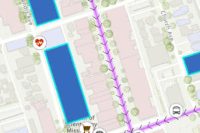

1


<Item title:"BIKE_ROUTES_Chula" type:Feature Layer Collection owner:betaati5279_SDSUGeo>
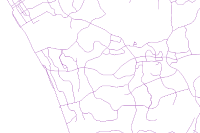

2


<Item title:"Bikeways (SANDAG)" type:Feature Layer Collection owner:gtaparan0306_SDSUGeo>

3


<Item title:"BikabilitySDJones_WFL1" type:Feature Layer Collection owner:jjones1969_SDSUGeo>
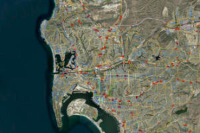

4


<Item title:"BIKE__ROUTES" type:Feature Layer Collection owner:anne.turcotte_UCSDOnline>
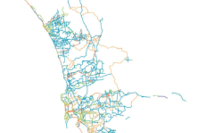

5


<Item title:"2022_ESRI_UC_Event_WFL1" type:Feature Layer Collection owner:vicky.duran>
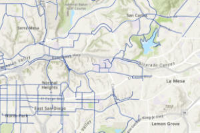

6


<Item title:"D1 Trail Map" type:Feature Layer Collection owner:District.1.GIS>
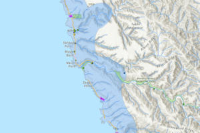

7


<Item title:"Barrio_Logan_MAD_WFL1" type:Feature Layer Collection owner:tysterns>
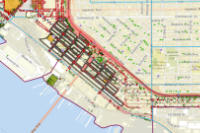

8


<Item title:"Logan Heights San Diego Community Connections and Mobility_WFL1" type:Feature Layer Collection owner:FelixLopezGIS>
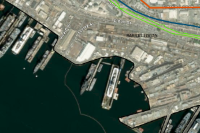

9


<Item title:"San Diego Bike and Transportation Routes_ Hazards _Potholes__WFL1" type:Feature Layer Collection owner:osanchez3067_SDSUGeo>
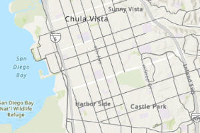

10


<Item title:"SD_Bikability_Jones" type:Feature Layer Collection owner:jjones1969_SDSUGeo>
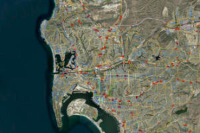

11


<Item title:"BIKE_ROUTES" type:Feature Layer Collection owner:tan029>
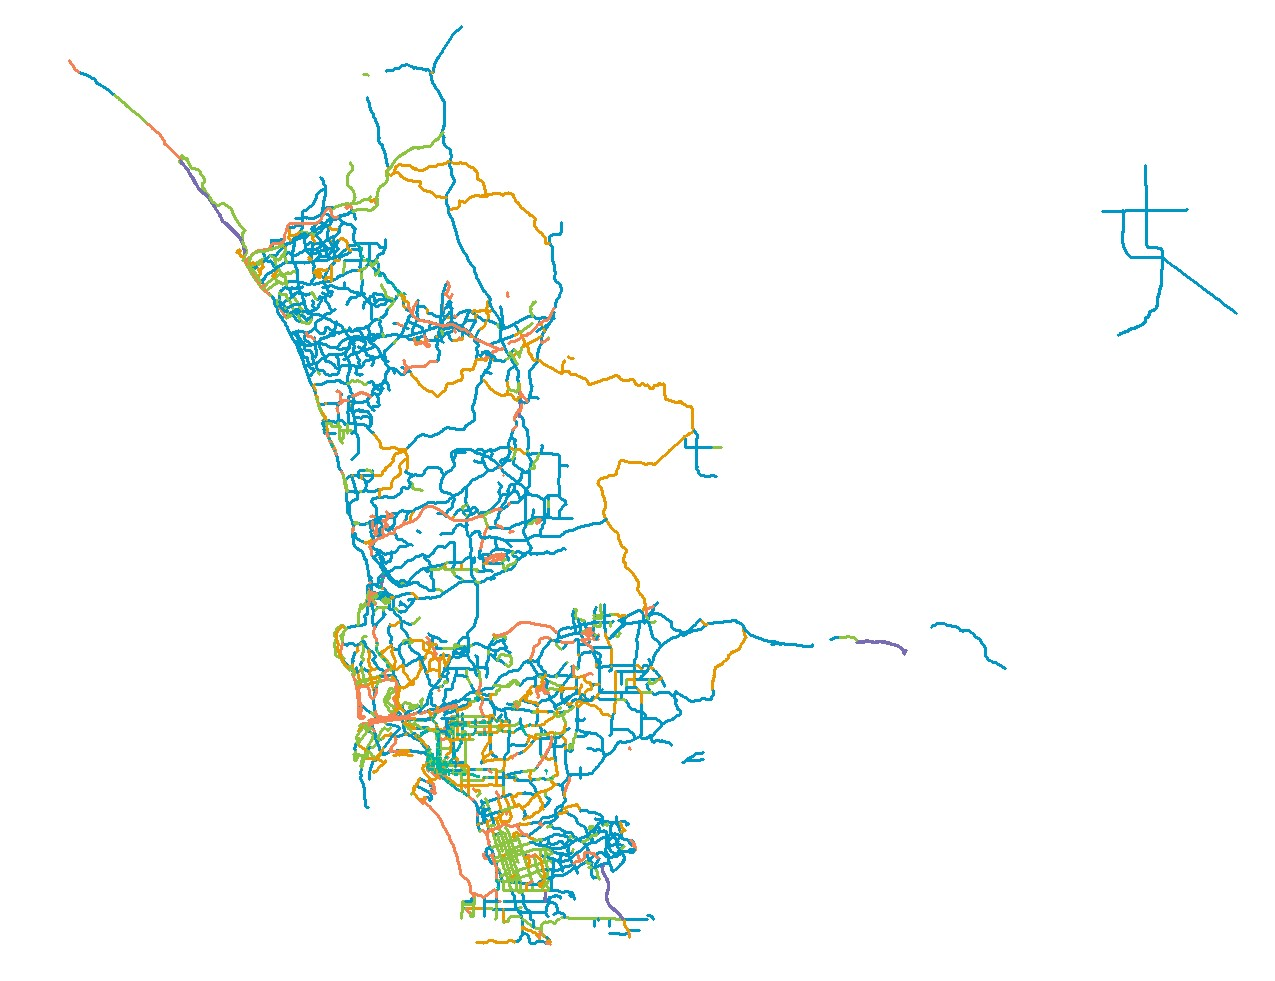

12


<Item title:"Snapdragon Stadium Bike Map _updated__WFL1" type:Feature Layer Collection owner:ogarcia1>
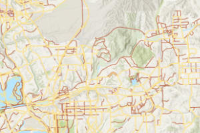

13


<Item title:"San Diego Bicycle Routes" type:Feature Layer Collection owner:jlogsdon7367_SDSUGeo>
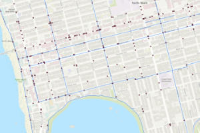

14


<Item title:"Bike Routes" type:Feature Layer Collection owner:CA_State_Lands_Commission>
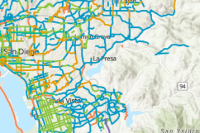

15


<Item title:"Bike_Routes_2020_Overwrite" type:Feature Layer Collection owner:ewendt>
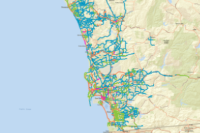

16


<Item title:"San Diego Mixed_Mode Bike Routes_WFL1" type:Feature Layer Collection owner:mkoehnk_ColumbusState>
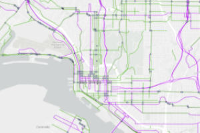

17


<Item title:"Bike Routes, San Diego County" type:Feature Layer Collection owner:HHub_SanDiego>
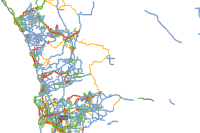

18


<Item title:"San Diego Park and Ride Locations" type:Feature Layer Collection owner:District11GIS>
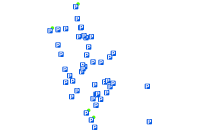

19


<Item title:"DAC_Sunrise" type:Feature Layer Collection owner:avn021_UCSDOnline>
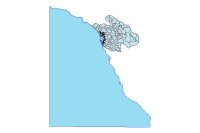

20


<Item title:"iBikeMap" type:Feature Layer Collection owner:ewendt>
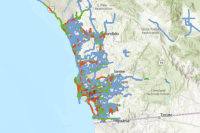

21


<Item title:"Park and Ride Lots" type:Feature Layer Collection owner:adam.attar>
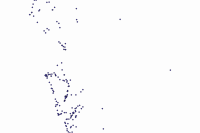

22


<Item title:"Bike Routes San Diego" type:Feature Layer Collection owner:jaiwoods@umail.ucsb.edu_ucsb>
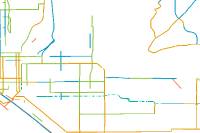

23


<Item title:"Current Bike Routes_WFL1" type:Feature Layer Collection owner:mterlep5037_SDSUGeo>
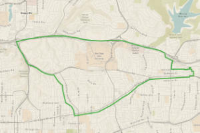

24


<Item title:"Existing_Bicycle_Facilities" type:Feature Layer Collection owner:chenryanassociates>
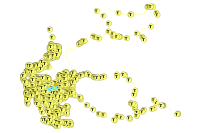

25


<Item title:"Bike_Routes_Selected_Feature" type:Feature Layer Collection owner:wericson@middlebury.edu_middlebury>
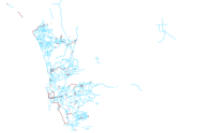

26


<Item title:"San Diego Crash Clusters" type:Feature Layer Collection owner:jlogsdon7367_SDSUGeo>
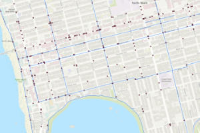

27


<Item title:"Lincoln Cluster Safe Routes to School_WFL1" type:Feature Layer Collection owner:cdockery_Circulatesd>
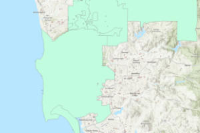

28


<Item title:"Summarize Within" type:Feature Layer Collection owner:esri_devlabs>

29


<Item title:"Freeway_Shoulder_Access" type:Feature Layer Collection owner:ewendt>
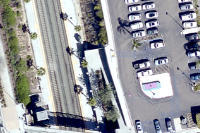

In [6]:
# iterate over the found items, and display them
from IPython.display import display
for i, g in enumerate(public_content):
    print(i)
    display(g)

In [7]:
# now there is a new method:

public_content2 = gis.content.advanced_search(query="'Bike Routes San Diego' AND owner:SANDAG_Admin", enrich=True, as_dict=False )
public_content2

{'total': 3,
 'start': 1,
 'num': 100,
 'nextStart': -1,
 'results': [<Item title:"5BM_ExistingTransportationNetwork" type:Map Image Layer owner:SANDAG_Admin>,
  <Item title:"San Diego Interactive Regional Bike Map" type:Web Mapping Application owner:SANDAG_Admin>,
  <Item title:"TransNet Story Map Master" type:Web Mapping Application owner:SANDAG_Admin>]}

In [8]:
public_content3 = gis.content.search(query="'Bike Routes San Diego' AND owner:SANDAG_Admin", outside_org=True)
public_content3

[<Item title:"TransNet Story Map Master" type:Web Mapping Application owner:SANDAG_Admin>,
 <Item title:"San Diego Interactive Regional Bike Map" type:Web Mapping Application owner:SANDAG_Admin>,
 <Item title:"5BM_ExistingTransportationNetwork" type:Map Image Layer owner:SANDAG_Admin>]

### Let's now create a base map, and we'll layer the found bike data over it

The following is a default map shown in a map widget 

In [9]:
map0 = gis.map()
map0


Map(extent={'type': 'extent', 'xmin': -14999999.999996956, 'ymin': 2699999.9999994184, 'xmax': -6199999.999998…


Note that adding a location name will request the system to <strong>geocode</strong> this location, figure out map coordinates and an appropriate zoom level, and generate a request to the server for map tiles 

In [10]:
map1 = gis.map('San Diego, CA')

# optionally, create a map in 3D, at specific zoom level:
# map1 = gis.map('San Diego, CA', zoomlevel = 4, mode="3D")
map1


Map(center=[3857636.3466711883, -13042616.481232138], extent={'xmin': -13075789.689488532, 'ymin': 3818273.910…

In [11]:
#get the item we like
bike_routes = public_content[20]

map1.content.add(bike_routes)

In [12]:
crash_clusters = public_content[29]
map1.content.add(crash_clusters)


In [13]:
# explore the map object, recenter it, change the basemap
map1.center
map1.center = [32.877,-117.2374]
# map1.basemaps
map1.basemap.basemap = 'hybrid'

# you can do some of these operations in the map widget directly, or through  


### Adding a LANDSAT image to the map

In [14]:
landsat_list = gis.content.search('"Landsat"', 'Imagery Layer', outside_org=True)

In [15]:
counter = 0
for item in landsat_list:
    print(str(counter) +" "+str(item))
    counter+=1

0 <Item title:"Forest carbon pools 2018" type:Imagery Layer owner:USFS_FIA>
1 <Item title:"Pansharpened Landsat" type:Imagery Layer owner:esri>
2 <Item title:"Panchromatic Landsat" type:Imagery Layer owner:esri>
3 <Item title:"Urban Heat Island Severity for U.S. cities - 2019" type:Imagery Layer owner:TPL_GIS_Support>
4 <Item title:"World Land Cover 30m BaseVue 2013 (Mature Support)" type:Imagery Layer owner:esri>
5 <Item title:"MODIS True Color - Terra Corrected Reflectance" type:Imagery Layer owner:esri>
6 <Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>
7 <Item title:"Landsat 8-9 Pansharpened" type:Imagery Layer owner:esri>
8 <Item title:"Landsat 8-9 Views" type:Imagery Layer owner:esri>
9 <Item title:"Imagery-Landsat Shaded Basemap" type:Imagery Layer owner:AAlvarez_amerigeoss>


In [16]:
#Let's add Multispectral Landsat to the map
landsat_ms = landsat_list[6]
map1.content.add(landsat_ms)

### Let's make sure the map looks right...

We would need to remove the bike layer, and then render it again on top of the landsat image. Let's figure out the layer indexes:

In [17]:
map1.content.layers

[<FeatureLayer url:"https://services1.arcgis.com/HG80xaIVT1z1OdO5/arcgis/rest/services/iBikeMap/FeatureServer/14">,
 Group Layer: Freeway_Shoulder_Access,
 <ImageryLayer url:"https://landsat2.arcgis.com/arcgis/rest/services/Landsat/MS/ImageServer">]

In [18]:
map1.content.remove(0)
map1.content.remove(0)
map1.content.add(bike_routes)
map1.content.add(crash_clusters)

In [19]:
map1.content.layers

[<ImageryLayer url:"https://landsat2.arcgis.com/arcgis/rest/services/Landsat/MS/ImageServer">,
 <FeatureLayer url:"https://services1.arcgis.com/HG80xaIVT1z1OdO5/arcgis/rest/services/iBikeMap/FeatureServer/14">,
 Group Layer: Freeway_Shoulder_Access]

## Let's find coordinates of San Diego. The process is called Geocoding

In [20]:
from arcgis.geocoding import geocode

# notice that now we enter "San Diego" and not "San Diego, CA"

area = geocode('San Diego')
len(area)
for i in area:
    print(i["attributes"]["Type"], i["attributes"]["LongLabel"], i["location"])

City San Diego, CA, USA {'x': -117.1638173, 'y': 32.71576}
City San Diego, CA, USA {'x': -117.16472, 'y': 32.71571}
City San Diego, Carabobo, VEN {'x': -67.95149, 'y': 10.25774}
City Cartago, La Union, San Diego, CRI {'x': -84.001, 'y': 9.90143}
County San Diego, Cesar, COL {'x': -73.290666490449, 'y': 10.167796346973}
County San Diego, Carabobo, VEN {'x': -67.952438404376, 'y': 10.264166813453}
City San Diego, Cesar, COL {'x': -73.18128, 'y': 10.33382}
City San Diego, La Trinitaria, Chiapas, MEX {'x': -91.9611312, 'y': 16.1133329}
City San Diego, Casas Grandes, Chihuahua, MEX {'x': -108.0105091, 'y': 30.2439268}
City San Diego, Silao de la Victoria, Guanajuato, MEX {'x': -101.4094789, 'y': 20.8879545}
City San Diego, Quitupan, Jalisco, MEX {'x': -102.833351, 'y': 19.8906458}
City San Diego, Santiago Tuxtla, Veracruz de Ignacio de la Llave, MEX {'x': -95.4323475, 'y': 18.2743115}
City San Diego, Dzemul, Yucatán, MEX {'x': -89.3059143, 'y': 21.2358164}
City San Diego, Valparaíso, Zacate

Notice that there are many objects with San Diego in the name, and they have different types

In [21]:
# Let's list all this information 
area

[{'address': 'San Diego, California',
  'location': {'x': -117.1638173, 'y': 32.71576},
  'score': 100,
  'attributes': {'Loc_name': 'World',
   'Status': 'T',
   'Score': 100,
   'Match_addr': 'San Diego, California',
   'LongLabel': 'San Diego, CA, USA',
   'ShortLabel': 'San Diego',
   'Addr_type': 'Locality',
   'Type': 'City',
   'PlaceName': 'San Diego',
   'Place_addr': 'San Diego, California',
   'Phone': '',
   'URL': '',
   'Rank': 2.5,
   'AddBldg': '',
   'AddNum': '',
   'AddNumFrom': '',
   'AddNumTo': '',
   'AddRange': '',
   'Side': '',
   'StPreDir': '',
   'StPreType': '',
   'StName': '',
   'StType': '',
   'StDir': '',
   'BldgType': '',
   'BldgName': '',
   'LevelType': '',
   'LevelName': '',
   'UnitType': '',
   'UnitName': '',
   'SubAddr': '',
   'StAddr': '',
   'Block': '',
   'Sector': '',
   'Nbrhd': '',
   'District': '',
   'City': 'San Diego',
   'MetroArea': '',
   'Subregion': 'San Diego County',
   'Region': 'California',
   'RegionAbbr': 'CA',
  

# How is this type of map different from the first map that we looked at?
 - layer organization: one can add or remove layers
 - layers can be of different types, raster and vector, and represent points, lines, areas.. 
 - each layer can be individually symbolized (more about that shortly) and manipulated
 - you can locate such layers (and other types of data) by searching online catalogs
 - you can then retrieve them using API calls, and add to your map
 - the API supports many other types of calls, such as geocoding
 
